In [1]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('base_temporais.xlsx')

# Limpando a coluna data e tranformando em datetime
df = df[pd.to_datetime(df['data'], errors='coerce').notna()]
df['data'] = pd.to_datetime(df['data'])

# Configurar a coluna 'data' como índice
df.set_index('data', inplace=True)

df.head()

,quantidade_dossies
data,
2021-01-01,7
2021-02-01,5
2021-03-01,1
2021-04-01,5
2021-05-01,6


C:\Users\pedro.cecere\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pedro.cecere\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\pedro.cecere\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


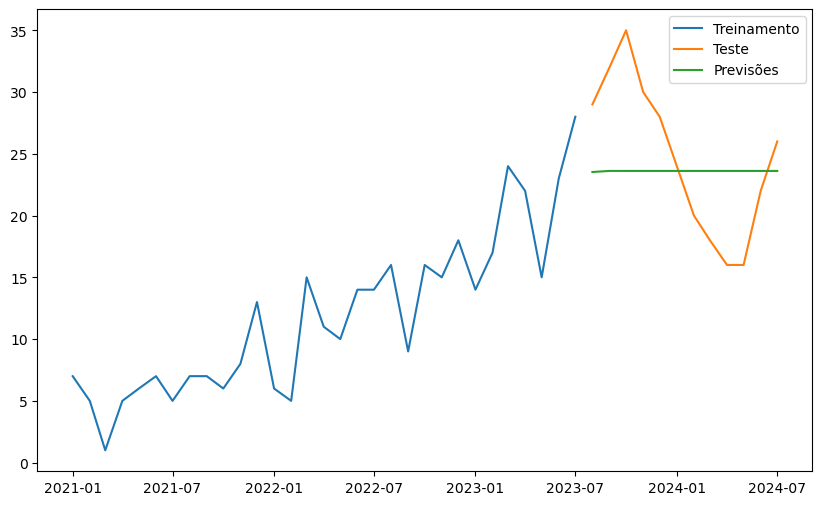

In [6]:
from statsmodels.tsa.arima.model import ARIMA

# Dividindo os dados em treinamento e teste
train = df.iloc[:-12]
test = df.iloc[-12:]

# Treinando o modelo ARIMA
model = ARIMA(train['quantidade_dossies'], order=(1, 1, 1))
model_fit = model.fit()

# Fazendo previsões
predictions = model_fit.forecast(steps=12)

# Visualizando os resultados
plt.figure(figsize=(10,6))
plt.plot(train['quantidade_dossies'], label='Treinamento')
plt.plot(test['quantidade_dossies'], label='Teste')
plt.plot(predictions, label='Previsões')
plt.legend()
plt.show()


In [7]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test['quantidade_dossies'], predictions)
print(f'MAE: {mae}')

MAE: 5.404808975733755
